## **Name : Vivek Bhimnath**

## **LGM Task : Prediction using Decision Tree**

## **Task:  Create the Decision Tree classifier and visualize it graphically.**

### Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Iris (2).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### All other features are numerical except "Species"

In [ ]:
df.shape

(150, 6)

### Data contains 150 rows and 6 columns  

In [ ]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### No null values are present

In [ ]:
df=df.drop(columns="Id")

### Dropping irrelevant columns

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## Data Visualization :

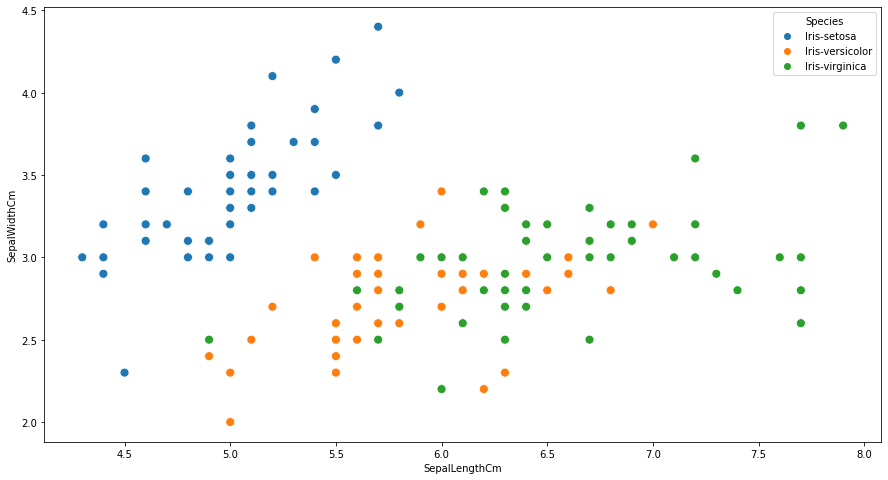

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df,hue="Species",s=80)

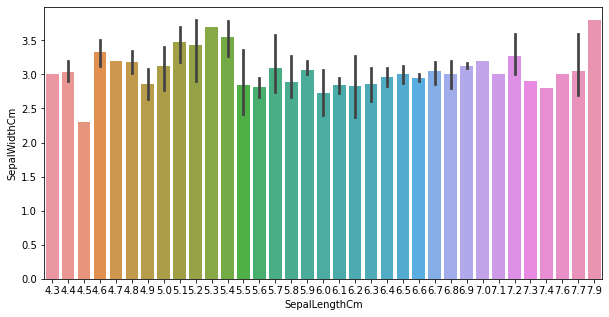

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="SepalLengthCm",y="SepalWidthCm",data=df,orient='v')

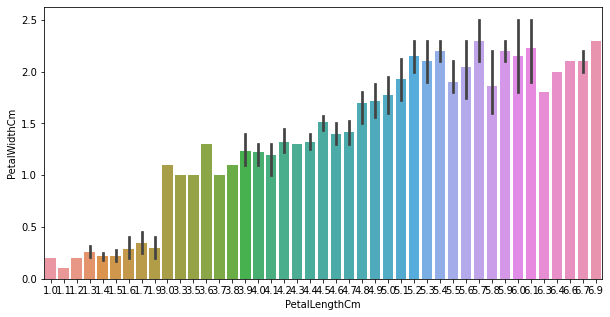

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="PetalLengthCm",y="PetalWidthCm",data=df,orient='v')

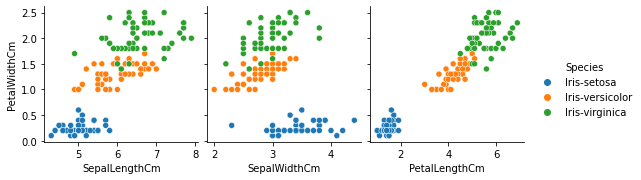

In [ ]:
sns.pairplot(x_vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm"],y_vars=["PetalWidthCm"],data=df,hue="Species")

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

In [ ]:
x=df.drop(columns="Species")
y=df["Species"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


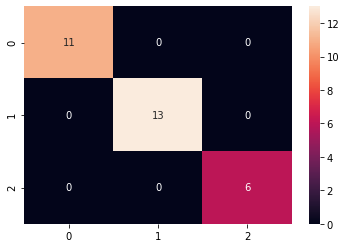

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))
print(accuracy)

In [ ]:
print(accuracy)

1.0


### Accuracy is 100%

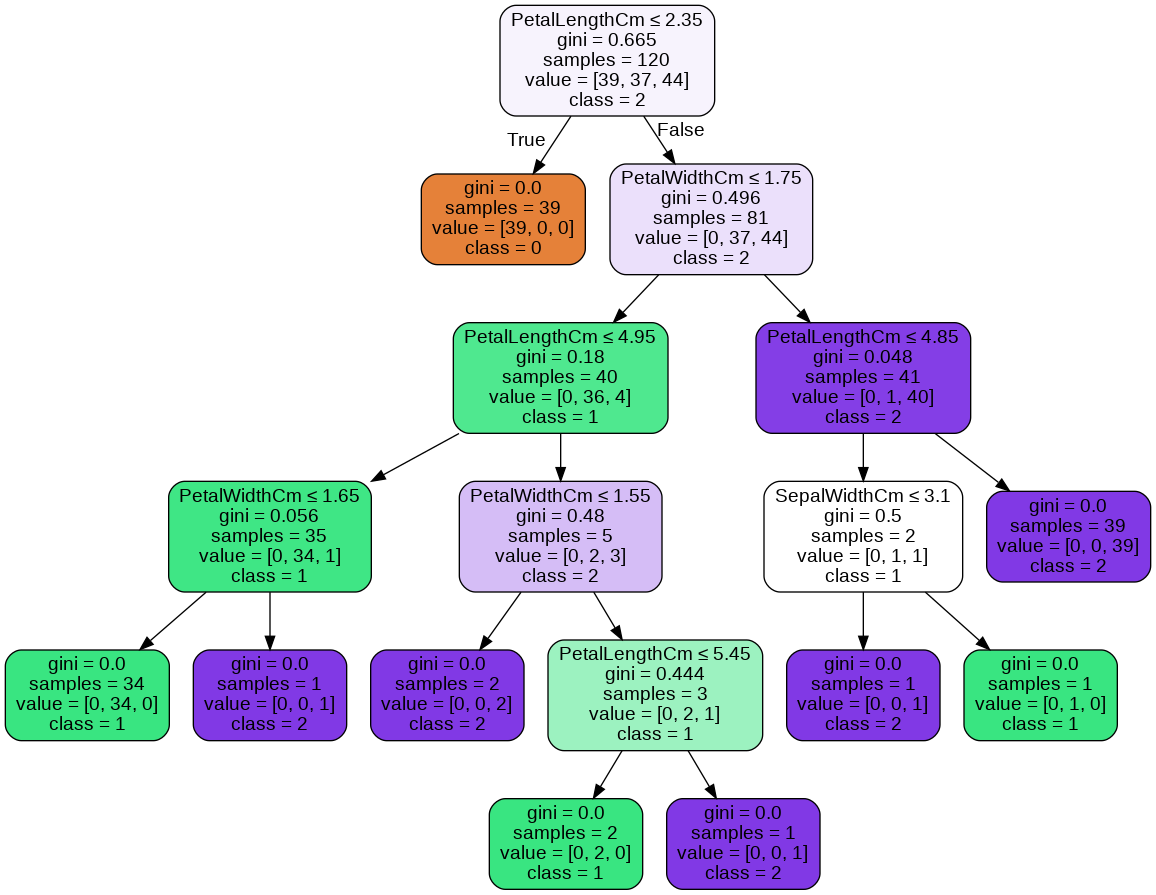

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =list(x.columns),class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())

## **Conclusion:**

### Iris dataset contains of various features like SepalLength,SepalWidth PetalLength,PetalWidth and Species and after implementing Decision Tree Algorithm I have achieved accuracy of 100% that is model is predicting perfectly without any residuals. 